# Part 0
(**7 points total**)

The goal of this section is to familiarize yourself with the Python [TensorFlow API](https://www.tensorflow.org/api_docs/python/index.html).

This part of the assignment is (very) similar to the first week's [TensorFlow notebook](https://github.com/datasci-w266/main/blob/master/week1/TensorFlow%20Tutorial.ipynb).  James went through it in detail in a [recorded](http://learn.datascience.berkeley.edu/local/adobecp/launch.php?cpurl=p3g4ab3qg61&recording=y&livesessionid=15968) office hour.  You may want to review those before continuing.  If you understood all that, this part should go very quickly.

Before we do anything, let's import all the code we're going to need for this part of the assignment.

In [73]:
import tensorflow as tf
import graph
import graph_test
from matplotlib import pyplot as plt
import unittest

%matplotlib inline

reload(graph)
reload(graph_test)

<module 'graph_test' from 'graph_test.pyc'>

## Simple Adder (2 points)

Open graph.py.  This file contains a number of skeleton classes that we will implement through the course of this notebook.

Implement the methods of the AddTwo class.  In particular:
- `__init__` should construct a graph with two placeholders (the numbers to add)
- `Add` should execute the graph with its two arguments and return the result.  It should not reconstruct the graph each time.

When you are done, execute the next cell to test it.

In [74]:
reload(graph)
reload(graph_test)
unittest.TextTestRunner(verbosity=2).run(
    unittest.TestLoader().loadTestsFromName(
        'TestAdder.test_adder', graph_test))

test_adder (graph_test.TestAdder) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.025s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

If you didn't already, make sure that your adder can handle parameters of any dimension.

In [75]:
reload(graph)
reload(graph_test)
unittest.TextTestRunner(verbosity=2).run(
    unittest.TestLoader().loadTestsFromName(
        'TestAdder.test_vector_adder', graph_test))

test_vector_adder (graph_test.TestAdder) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.014s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

## Affine & Fully Connected Layers

In this section, you don't need to create the graph and session (but we wanted you to do it once so that you know how!).  Instead, you will simply implement functions that construct parts of a larger graph.

You will first build an affine layer: $z = xW + b$ and then a stack of fully connected layers $h = f(xW + b)$.

### Affine (1 point)
In particular, your function will accept a TensorFlow Op that represents the value of $x$ and should return value $z$ of desired dimension.  You must construct whatever variables you need.

Implement affine_layer(...).

Hints:
- use `tf.get_variable()` to create variables.
- `W` should be randomly initialized: xavier_initialization
- `b` should be initialized to a vector of 0s
- `a * b` is a element-wise product.  Look for the function that performs matrix products!

In [76]:
reload(graph)
reload(graph_test)
unittest.TextTestRunner(verbosity=2).run(
    unittest.TestLoader().loadTestsFromName(
        'TestLayer.test_affine', graph_test))

test_affine (graph_test.TestLayer) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.050s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

### FC Layers (1 point)
Next, we'll build a fully-connected layer, which we can use to build a network of arbitrary depth.

- Implement the `fully_connected_layers()` function.

*Hint:* Reuse the `affine_layer()` function you already wrote!

In [77]:
reload(graph)
reload(graph_test)
unittest.TextTestRunner(verbosity=2).run(
    unittest.TestLoader().loadTestsFromName(
        'TestLayer.test_fully_connected_layers', graph_test))

test_fully_connected_layers (graph_test.TestLayer) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.076s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

# Training a Neural Network (3 points)

Let's put it all together, and build a simple neural network that fits some training data.

- Implement the `train_nn()` function.

**Note:** you will need to do all the work (creating the graph and the session and a training op).

To get the tests to pass, please use tf.train.GradientDescentOptimizer as your optimizer.

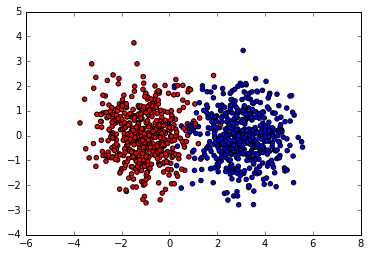

In [78]:
reload(graph_test)
X_train, y_train, X_test, y_test = graph_test.generate_data(1000, 10)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr')

In [103]:
reload(graph)
reload(graph_test)
unittest.TextTestRunner(verbosity=2).run(
    unittest.TestLoader().loadTestsFromName(
        'TestNN.test_train_nn', graph_test))

test_train_nn (graph_test.TestNN) ... 

Initial loss: 0.680505
Step:  20 Loss: 0.685954
Step:  6020 Loss: 0.683677
Step:  12020 Loss: 0.681536
Step:  18020 Loss: 0.678692
Step:  24020 Loss: 0.676036
Step:  30020 Loss: 0.674093
Step:  36020 Loss: 0.672284
Step:  42020 Loss: 0.670564
Step:  48020 Loss: 0.668789
Step:  54020 Loss: 0.667219
Step:  60020 Loss: 0.665826
Step:  66020 Loss: 0.664543
Step:  72020 Loss: 0.663394
Step:  78020 Loss: 0.662382
Step:  84020 Loss: 0.661467
Step:  90020 Loss: 0.660649
Step:  96020 Loss: 0.659921


ok

----------------------------------------------------------------------
Ran 1 test in 32.763s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

That was fairly straightforward...  the data is clearly linearly separable.

### Tuning Parameters

Let's try something a bit harder!

Here, we'll train a neural network with a couple of hidden layers before the final sigmoid.  This lets the network learn non-linear decision boundaries.

Try playing around with the hyperparameters to get a feel for what happens if you set the learning rate too big (or too small), or if you don't give the network enough capacity (i.e. hidden layers and width).

In [104]:
reload(graph)
reload(graph_test)
unittest.TextTestRunner(verbosity=2).run(
    unittest.TestLoader().loadTestsFromName(
        'TestNN.test_train_nn_with_fclayers', graph_test))

test_train_nn_with_fclayers (graph_test.TestNN) ... 

Initial loss:

ERROR

ERROR: test_train_nn_with_fclayers (graph_test.TestNN)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "graph_test.py", line 61, in test_train_nn_with_fclayers
    [10, 22, 37], 50, 2000, 0.001)
  File "graph.py", line 131, in train_nn
    print 'Initial loss:', sess.run(loss, feed_dict={x_ph: X, y_ph: y})
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/client/session.py", line 717, in run
    run_metadata_ptr)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/client/session.py", line 915, in _run
    feed_dict_string, options, run_metadata)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/client/session.py", line 965, in _do_run
    target_list, options, run_metadata)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/client/session.py", line 985, in _do_call
    raise type(e)(node_def, op, message)
InvalidArgumentError: Incompatible shapes: [1000,37] v

<unittest.runner.TextTestResult run=1 errors=1 failures=0>

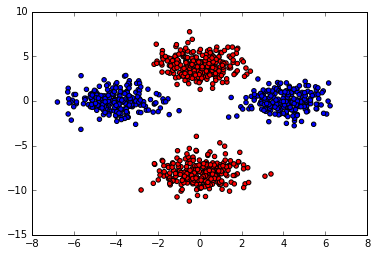

In [105]:
reload(graph_test)
X_train, y_train, X_test, y_test = graph_test.generate_non_linear_data(1000, 10)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr')

In [106]:
hidden_layers = [10, 10]
batch_size = 50
epochs = 2000
learning_rate = 0.001
predictions = graph.train_nn(X_train, y_train, X_test, hidden_layers, batch_size, epochs, learning_rate)

Initial loss:

InvalidArgumentError: Incompatible shapes: [1000,10] vs. [1000]
	 [[Node: loss/mul = Mul[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"](Squeeze, _recv_Placeholder_1_0)]]

Caused by op u'loss/mul', defined at:
  File "/usr/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 589, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 405, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 883, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 260, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 212, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 370, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py", line 175, in do_execute
    shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2723, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2825, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2885, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-106-e9fa8cfc9bd1>", line 5, in <module>
    predictions = graph.train_nn(X_train, y_train, X_test, hidden_layers, batch_size, epochs, learning_rate)
  File "graph.py", line 114, in train_nn
    loss = tf.reduce_mean(tf.squeeze(tf.nn.sigmoid_cross_entropy_with_logits(y_hat, y_ph, name="loss")))
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/nn.py", line 448, in sigmoid_cross_entropy_with_logits
    return math_ops.add(relu_logits - logits * targets,
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_ops.py", line 751, in binary_op_wrapper
    return func(x, y, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_ops.py", line 910, in _mul_dispatch
    return gen_math_ops.mul(x, y, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gen_math_ops.py", line 1519, in mul
    result = _op_def_lib.apply_op("Mul", x=x, y=y, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py", line 749, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Incompatible shapes: [1000,10] vs. [1000]
	 [[Node: loss/mul = Mul[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"](Squeeze, _recv_Placeholder_1_0)]]


In [107]:
plt.scatter(X_test[:,0], X_test[:,1], c=predictions, cmap='bwr')

NameError: name 'predictions' is not defined

That looks pretty good!

Let's compare the predictions vs. the labels and see what we got wrong...

In [ ]:
plt.scatter(X_test[:,0], X_test[:,1], c=(predictions==y_test), cmap='bwr')

Only a tiny number of errors (hopefully!).  Good work!

## Congratulations

You have implemented a deep neural network using tensorflow!

One remaining API you may want to take a look at is [tf.nn.embedding_lookup](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#embedding_lookup).  As you might expect from the name, it is what to use to map word ids to word vectors.  Concretely, the first parameter is the embedding matrix (a variable of dimension vocab x wordvec length) and the second are indexes to lookup.